# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [106]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

- <범주형 vs 범주형>

* 가설1 : 대학졸업 여부(COLLEGE)가 이탈여부(CHURN)에  영향이 없을 것이다.

* 가설2 : 만족도 설문(REPORTED_SATISFACTION)결과가 좋을수록 따라 이탈여부(CHURN)가 낮을것이다.

* 가설3 : 변경 계획 설문(CONSIDERING_CHANGE_OF_PLAN)에 따라 이탈여부(CHURN)과 관련이 있을까?

- <숫자형 vs 범주형>

- 가설4 : 연 수입액(달러)(INCOME)이 높으면 이탈여부(CHURN)가 낮다.

* 가설5 : 월 초과 사용 시간(분)(OVERAGE)가 높을 수록 다른 경쟁사  요금제를 많이 확인해서, 이탈여부(CHURN)가 높다.

* 가설6 : 월 사용 잔여시간(분)(LEFTOVER)에 따라 이탈여부(CHURN) 낮다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) feature1 : COLLEGE	대학졸업 여부

In [54]:
feature = 'COLLEGE'

① 변수의 비즈니스 의미

> 대학졸업 여부(1,0)

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [55]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [56]:
print(mobile[feature].value_counts())
print()
print(mobile[feature].value_counts()/ len(mobile[feature]))

1    9049
0    8951
Name: COLLEGE, dtype: int64

1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


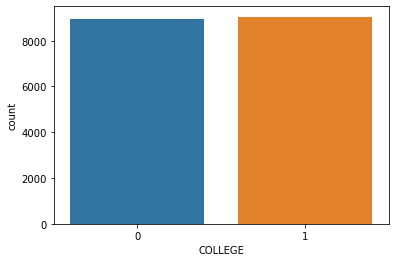

In [57]:
sns.countplot(mobile[feature])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 졸업여부가 숫자 및 비율이 비슷하다. 두 그룹으로 나눠 만족도 설문(REPORTED_SATISFACTION)을 자세히 살펴보면 좋겠다.

⑦ 추가 분석해 볼 사항이 있나요?

> - 졸업여부 기준으로 두 그룹으로 나누어 그룹핑을 해서, 평균 통화시간(분) AVERAGE_CALL_DURATION)을 추가로 살펴보자

### 2) feature2 : REPORTED_SATISFACTION	(만족도 설문)

In [58]:
feature = 'REPORTED_SATISFACTION'

① 변수의 비즈니스 의미

> 만족도 설문: ('very_unsat', 'unsat', 'avg', 'sat', 'very_sat')

② 숫자, 범주?

In [60]:
mobile[feature].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

In [61]:
mobile[feature].unique()

array(['unsat', 'very_unsat', 'very_sat', 'sat', nan, 'avg'], dtype=object)

> 범주

③ NaN 존재 유무

In [69]:
print('결측치 수: {}'.format(mobile[feature].isna().sum()))
print('결측치 퍼센트: {}'.format(mobile[feature].isna().sum()/len(mobile[feature])), "%")

결측치 수: 38
결측치 퍼센트: 0.002111111111111111 %


> → 결측치가 있다

> - mobile 데이터의 한 행은 고객 정보로, 고객 한명한명이 unique하기 때문에, 시계열 자료처럼 앞 뒤 행을 가지고 추정할 수 없다.
> - 결측치 수 및 퍼센트가 작으니까 여기서는 결측치를 삭제 하겠다.

In [70]:
mobile.dropna(subset=[feature], inplace=True)

In [71]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [72]:
print(mobile[feature].value_counts())
print()
print(mobile[feature].value_counts()/ len(mobile[feature]))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


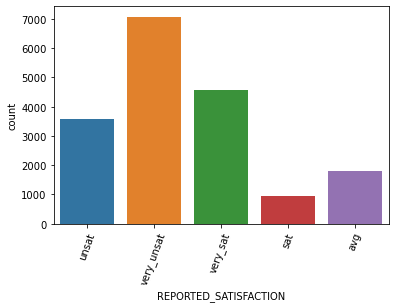

In [74]:
sns.countplot(mobile[feature])
plt.xticks(rotation = 70)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 매우 만족하지 못하는 고객수가 제일 많은 것으로 보아 이탈여부와 관련이 있을까 궁금하다.

⑦ 추가 분석해 볼 사항이 있나요?

> 만족, 보통, 불만족 3개의 그룹으로 나눠서 살펴보면 좋겠다.

### 3) feature3 : CONSIDERING_CHANGE_OF_PLAN(변경 계획 설문)

In [75]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

① 변수의 비즈니스 의미

> 변경 계획 설문: ('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it')

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [76]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [77]:
print(mobile[feature].value_counts())
print()
print(mobile[feature].value_counts()/ len(mobile[feature]))

considering                 7122
actively_looking_into_it    4446
no                          3639
never_thought               1800
perhaps                      955
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64

considering                 0.396504
actively_looking_into_it    0.247523
no                          0.202594
never_thought               0.100212
perhaps                     0.053168
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


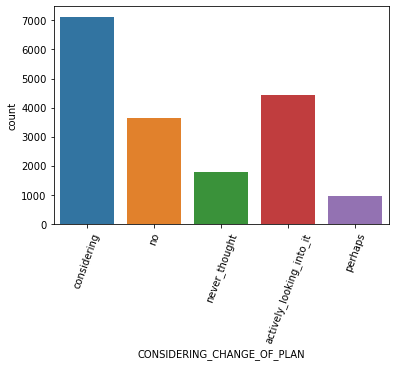

In [78]:
sns.countplot(mobile[feature])
plt.xticks(rotation = 70)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 통신사 바꾸는 것을 고려 중인 고객이 제일 많은 것으로 보아, 현재 통신사에서 제공중인 서비스가 나쁘지는 않지만 조금 아쉬워 하는 것이 아닐까?

⑦ 추가 분석해 볼 사항이 있나요?

> 핸드폰가격(HANDSET_PRICE) feature와 관계가 있을까? 비싼 휴대폰을 사용하기 때문에 통신서비스도 고급이길 바라는 것이 아닐까?

### 4) feature4 : INCOME(연 수입액(달러))

In [79]:
feature = 'INCOME'

① 변수의 비즈니스 의미

> 연 수입액(달러)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [80]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [81]:
mobile[feature].describe()

count     17962.000000
mean      80318.592195
std       41698.185540
min       20007.000000
25%       42172.000000
50%       75510.500000
75%      116082.750000
max      159983.000000
Name: INCOME, dtype: float64

⑤ 분포 확인(시각화)

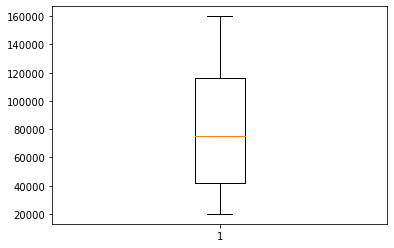

20007.0 159983.0


In [22]:
box = plt.boxplot(mobile[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

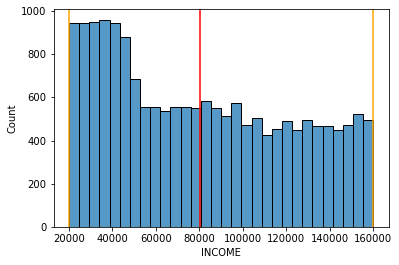

In [23]:
avg = mobile[feature].mean()

sns.histplot(mobile[feature], bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

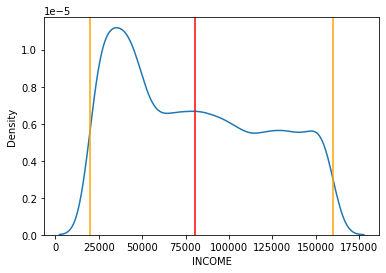

In [25]:
sns.kdeplot(data = mobile, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 연 수입액은 50000 달러 이하가 가장 많다. 
> - 연 수입액 50000 달러 를 기준으로 평균소득 집단과 평균소득 초과 집단으로 나누어 분석하면 더 정확한 정보를 얻을 수 있지 않을까?

⑦ 추가 분석해 볼 사항이 있나요?

> 50000을 기준으로 그래프를 나눠서 봐야 더 정확한 정보를 얻을 수 있을꺼 같아 보인다.

### 5) feature5 : OVERAGE (월 초과사용 시간(분))

In [107]:
feature = 'OVERAGE'

① 변수의 비즈니스 의미

> 월 초과사용 시간(분)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [108]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [109]:
mobile[feature].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

> 월 초과사용 시간(분)은 마이너스가 나올 수 없다. 마이너스가 나온이유가 평균값으로 집어넣어져서 그렇다고 한다. 
> 양수만으로 분석을 해야할 필요가 있어 보인다.

In [110]:
mobile[feature].sort_values()

3308      -2
8999       0
15685      0
15687      0
7336       0
        ... 
17982    295
14717    296
12871    298
2267     301
9907     335
Name: OVERAGE, Length: 18000, dtype: int64

> → 음수는 -2하나 밖에 없으니까 0으로 대체하자 해보자  
OVERAGE (월 초과사용 시간(분)) feature을 만들면서 생긴 마이너스 일테니까

In [111]:
mobile[feature][3308]

-2

In [112]:
mobile[feature][3308] = 0

<ipython-input-112-a4d72689b7a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile[feature][3308] = 0


In [113]:
mobile[feature][3308]

0

In [114]:
mobile[feature].describe()

count    18000.000000
mean        86.014944
std         85.963869
min          0.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

> 마이너스를 0으로 대체 완료

⑤ 분포 확인(시각화)

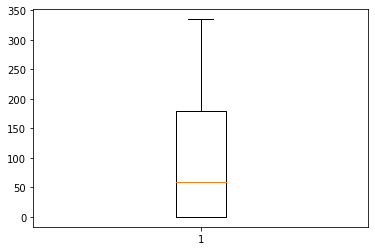

0.0 335.0


In [115]:
box = plt.boxplot(mobile[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

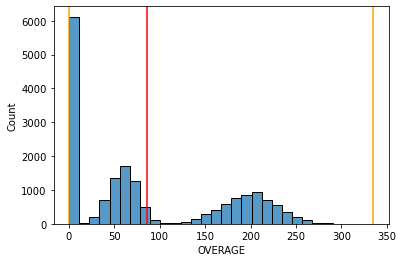

In [116]:
avg = mobile[feature].mean()

sns.histplot(mobile[feature], bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

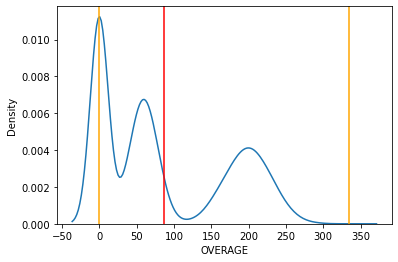

In [117]:
sns.kdeplot(data = mobile, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 그래프 봉오리가 3개가 보인다. 특이한 그래프이다.  
> - 월 초과사용 시간이 0분 인 고객은 초과사용을 하지 않는 고객이기 때문에 제외 시킬 필요가 있어 보인다.  
> - 두번째 봉오리에 있는 고객들이 매번 월 초과 사용시간이 저러한 것인지 일회성인지 확인해볼 필요가 있어 보인다.
> - 세번째 봉오리에 있는 고객들은 뭔가 직장인이지 않을 까? 영업직이나 전화를 많이 하는 고객들이지 않을까?

⑦ 추가 분석해 볼 사항이 있나요?

> 세번째 봉오리에 있는 고객들과 연 수입액(INCOME)가 연관이 있을까?

### 6) feature : LEFTOVER(월 사용 잔여시간(분))

In [185]:
feature = 'LEFTOVER'

① 변수의 비즈니스 의미

> 월 사용 잔여시간(분)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [186]:
mobile[feature].isna().sum()

0

④ 기초통계량(수치화)

In [187]:
mobile[feature].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

⑤ 분포 확인(시각화)

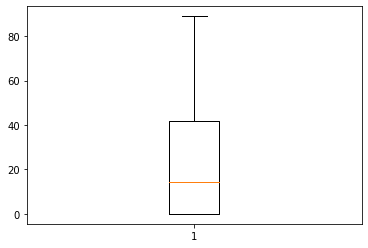

0.0 89.0


In [188]:
box = plt.boxplot(mobile[feature])
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
print(l_fence, u_fence)

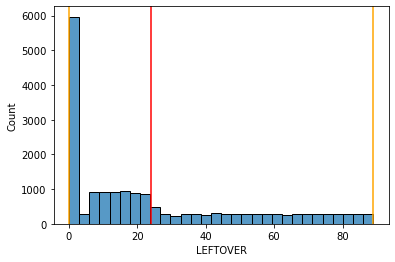

In [189]:
avg = mobile[feature].mean()

sns.histplot(mobile[feature], bins = 30)

plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

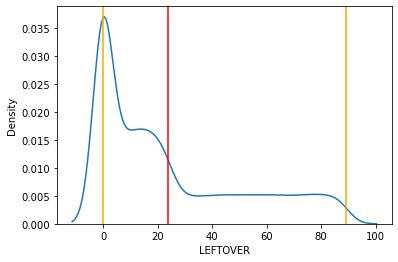

In [190]:
sns.kdeplot(data = mobile, x = feature)
plt.axvline(l_fence, color = 'orange')
plt.axvline(avg, color = 'r')
plt.axvline(u_fence, color = 'orange')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> LEFTOVER(월 사용 잔여시간(분))이 0분 인 고객은 잔여시간을 딱 맞게 사용하거나 그 이상 사용하는 고객으로 보인다.

⑦ 추가 분석해 볼 사항이 있나요?

> LEFTOVER(월 사용 잔여시간(분))이 남지 않은 고객들이 OVERAGE(월 초과사용 시간(분)) 이 높은 것이 아닐까?

### 7) target : CHURN(이탈여부)

In [191]:
target = 'CHURN'

① 변수의 비즈니스 의미

> 1 : 이탈, 0 : 잔류

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [193]:
mobile[target].isna().sum()

0

④ 기초통계량(수치화)

In [196]:
print(mobile[target].value_counts())
print()
print(mobile[target].value_counts()/ len(mobile[target]))

0    9131
1    8869
Name: CHURN, dtype: int64

0    0.507278
1    0.492722
Name: CHURN, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


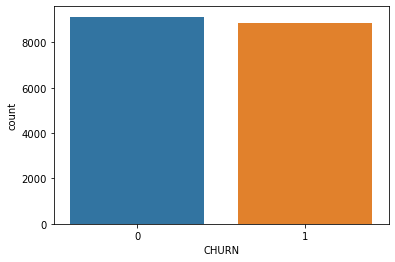

In [198]:
sns.countplot(mobile[target])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 이탈여부의 숫자가 비슷해 보이고 별로 차이가 없어보인다.

⑦ 추가 분석해 볼 사항이 있나요?

> 이탈여부와 관계가 많은 feature는 무엇일까? 어떠한 조건에 영향을 받게 될까?

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [119]:
target = 'CHURN'

### (1) 범주형 Feature --> 범주형CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [120]:
# 전체 이탈율
total_mean = mobile[target].mean()
print(total_mean)

0.49272222222222223


#### 1) COLLEGE(대학졸업 여부) --> CHURN

In [144]:
feature = 'COLLEGE'

① 교차표(pd.crosstab())

In [145]:
temp = pd.crosstab(mobile[target], mobile[feature], normalize = 'columns')
temp

COLLEGE,0,1
CHURN,,
0,0.515697,0.49895
1,0.484303,0.50105


② 시각화( Stacked Bar, Mosaic)

CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


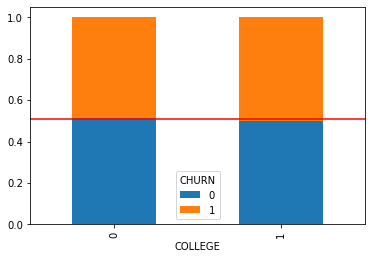

In [146]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked = True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

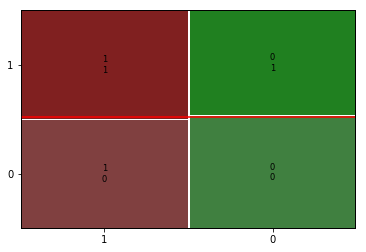

In [147]:
mosaic(mobile, [feature, target])
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 그래프로는 큰 차이가 없어 보인다.

③ 가설검정(카이제곱검정)

In [131]:
# 먼저 집계
table = pd.crosstab(mobile[feature], mobile[target])
print('교차표\n', table)
print('='*50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(result[0]))
print('p-value : {}'.format(result[1]))
print('자유도 : {}'.format(result[2]))
print('기대빈도 :\n {}'.format(result[3]))

교차표
 CHURN       0     1
COLLEGE            
0        4616  4335
1        4515  4534
카이제곱통계량 : 4.982102934693502
p-value : 0.02561083347822053
자유도 : 1
기대빈도 :
 [[4540.64338889 4410.35661111]
 [4590.35661111 4458.64338889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> v-value가 0.05보다 작으므로, COLLEGE(대학졸업 여부)와 CHURN(이탈여부)는 관련이 있다.

#### 2)  REPORTED_SATISFACTION(만족도 설문) --> CHURN

In [151]:
feature = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [152]:
temp = pd.crosstab(mobile[target], mobile[feature], normalize = 'columns')
temp

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.527132,0.527897,0.499164,0.511618,0.50099
1,0.472868,0.472103,0.500836,0.488382,0.49901


② 시각화( Stacked Bar, Mosaic)

CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


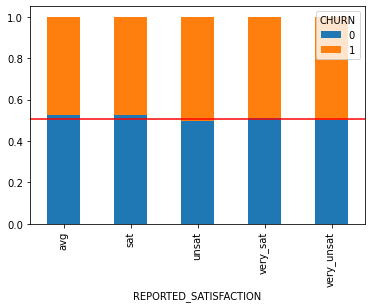

In [153]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked = True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

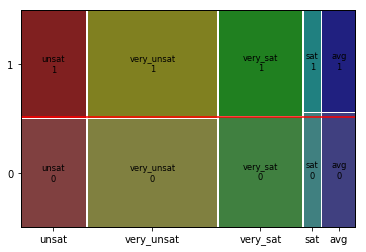

In [154]:
mosaic(mobile, [feature, target])
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 시각적으로 보니 관련이 없어 보인다.

③ 가설검정(카이제곱검정)

In [155]:
# 먼저 집계
table = pd.crosstab(mobile[feature], mobile[target])
print('교차표\n', table)
print('='*50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(result[0]))
print('p-value : {}'.format(result[1]))
print('자유도 : {}'.format(result[2]))
print('기대빈도 :\n {}'.format(result[3]))

교차표
 CHURN                     0     1
REPORTED_SATISFACTION            
avg                     952   854
sat                     492   440
unsat                  1792  1798
very_sat               2334  2228
very_unsat             3543  3529
카이제곱통계량 : 6.841100957205645
p-value : 0.14452738878905058
자유도 : 4
기대빈도 :
 [[ 916.27201871  889.72798129]
 [ 472.84912593  459.15087407]
 [1821.38236277 1768.61763723]
 [2314.5254426  2247.4745574 ]
 [3587.97104999 3484.02895001]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> v-value가 0.05보다 크므로, REPORTED_SATISFACTION(만족도 설문)와 CHURN(이탈여부)는 관련이 없다.

#### 3) CONSIDERING_CHANGE_OF_PLAN(변경 계획 설문) --> CHURN

In [156]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

① 교차표(pd.crosstab())

In [157]:
temp = pd.crosstab(mobile[target], mobile[feature], normalize = 'columns')
temp

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,0.511565,0.510853,0.513304,0.500274,0.475992
1,0.488435,0.489147,0.486696,0.499726,0.524008


② 시각화( Stacked Bar, Mosaic)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


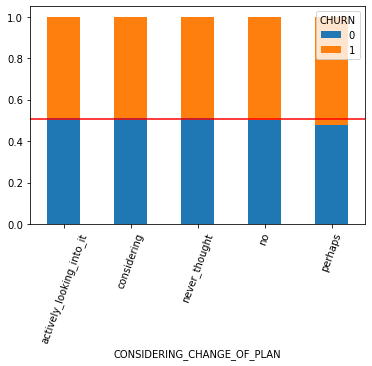

In [159]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
print(temp)

temp.plot.bar(stacked = True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.xticks(rotation = 70)
plt.show()

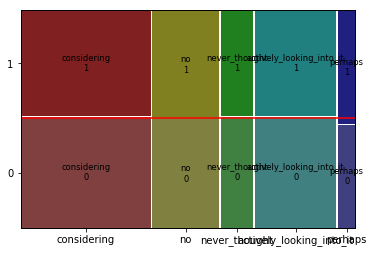

In [160]:
mosaic(mobile, [feature, target])
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 시각적으로 관련이 없어 보인다

③ 가설검정(카이제곱검정)

In [161]:
# 먼저 집계
table = pd.crosstab(mobile[feature], mobile[target])
print('교차표\n', table)
print('='*50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print("카이제곱통계량 : {}".format(result[0]))
print('p-value : {}'.format(result[1]))
print('자유도 : {}'.format(result[2]))
print('기대빈도 :\n {}'.format(result[3]))

교차표
 CHURN                          0     1
CONSIDERING_CHANGE_OF_PLAN            
actively_looking_into_it    2278  2175
considering                 3648  3493
never_thought                926   878
no                          1823  1821
perhaps                      456   502
카이제곱통계량 : 5.421434419620688
p-value : 0.24672225866799702
자유도 : 4
기대빈도 :
 [[2258.90794444 2194.09205556]
 [3622.47061111 3518.52938889]
 [ 915.12911111  888.87088889]
 [1848.52022222 1795.47977778]
 [ 485.97211111  472.02788889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> v-value가 0.05보다 크므로, CONSIDERING_CHANGE_OF_PLAN(변경 계획 설문) )와 CHURN(이탈여부)는 관련이 없다.

### (2) 숫자형 Feature --> 범주형 CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1)  INCOME(연 수입액(달러)) --> CHURN


In [162]:
feature = 'INCOME'

① 그래프 : histogram, densityplot

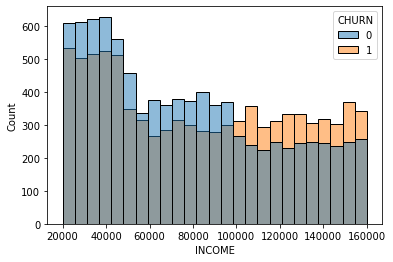

In [163]:
sns.histplot(x=feature, data = mobile, hue = target)
plt.show()

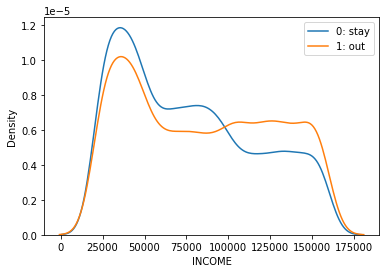

In [167]:
m0 = mobile.loc[mobile[target]==0]
m1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=feature, data = m0, label = '0: stay')
sns.kdeplot(x=feature, data = m1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> INCOME(연 수입액(달러))와 CHURN(이탈여부)는 관련이 조금 있어보인다.

② 수치화 : 로지스틱회귀

In [169]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
p-value: INCOME    0.000044
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> v-value가 0.05보다 작으므로, CONSIDERING_CHANGE_OF_PLAN(변경 계획 설문) )와 CHURN(이탈여부)는 관련이 있다. (약한 관계)

#### 2) OVERAGE(월 초과사용 시간(분)) --> CHURN


In [170]:
feature = 'OVERAGE'

① 그래프 : histogram, densityplot

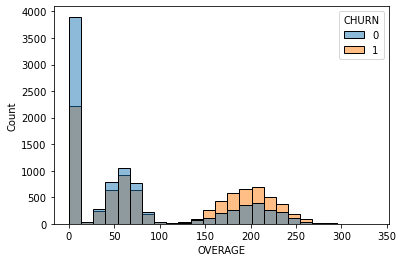

In [171]:
sns.histplot(x=feature, data = mobile, hue = target)
plt.show()

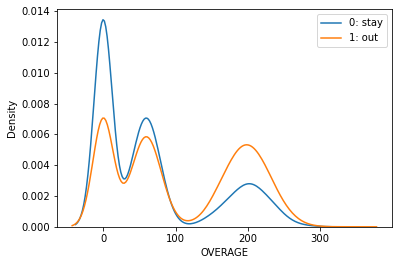

In [172]:
m0 = mobile.loc[mobile[target]==0]
m1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=feature, data = m0, label = '0: stay')
sns.kdeplot(x=feature, data = m1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> OVERAGE(월 초과사용 시간(분)) 와 CHURN(이탈여부)는 관련이 조금 커보인다.

② 수치화 : 로지스틱회귀

In [173]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
p-value: OVERAGE    3.529820e-97
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> v-value가 0.05보다 작으므로, OVERAGE(월 초과사용 시간(분))와 CHURN(이탈여부)는 관련이 있다. (강한 관계)

> 회사에 수익을 창출시켜주는 고객이 이탈률이 가장높다. 이러한 이탈률을 낮추기 위해 전략을 세울 필요가 있다.

#### 3) LEFTOVER(월 사용 잔여시간(분)) --> CHURN


In [174]:
feature = 'LEFTOVER'

① 그래프 : histogram, densityplot

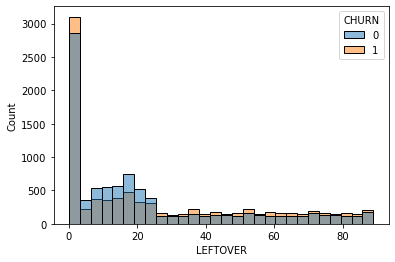

In [175]:
sns.histplot(x=feature, data = mobile, hue = target)
plt.show()

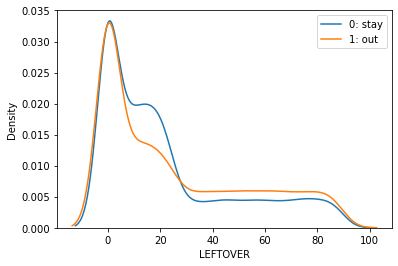

In [176]:
m0 = mobile.loc[mobile[target]==0]
m1 = mobile.loc[mobile[target]==1]

sns.kdeplot(x=feature, data = m0, label = '0: stay')
sns.kdeplot(x=feature, data = m1, label = '1: out')
plt.legend()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> LEFTOVER(월 사용 잔여시간(분)) 와 CHURN(이탈여부)는 관련이 커보인다.

② 수치화 : 로지스틱회귀

In [177]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print('p-value: {}'.format(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
p-value: LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> v-value가 0.05보다 작으므로, LEFTOVER(월 사용 잔여시간(분))와 CHURN(이탈여부)는 관련이 있다. (강한 관계)

## 4.관계 정리

### 1) 강한관계의 변수

> HOUSE, LEFTOVER, OVERAGE

### 2) 약한관계의 변수

> HANDSET_PRICE,INCOME

### 3) 관계 없음

> COLLEGE, REPORTED_SATISFACTION, CONSIDERING_CHANGE_OF_PLAN

## 5.추가 분석

> 결론

- 이탈에 약하게 영향을 주는 요인
핸드폰 가격이 높을수록 이탈을 더 많이 하는 경향이 있다. 이것은 핸드폰 가격이 높음에 따라 더 나은 서비스를 기대할 것이라는
소비자의 심리가 반영된 것으로 추측된다. 핸드폰 가격이 높은 고객들에게 더 나은 서비스를 혹은 특별 서비스를 제공한다면 
이탈을 막을 수 있을 것이라 생각한다. 

- 이탈에 관계없는 요인
만족도 설문, 변경 계획 설문은 고객의 답변이 성실히 임하였는지에 대한 여부를 판단할 수 없기 때문에 설문이라는 특성상 
참고자료로만 사용되는 것이 좋다고 생각한다. 이탈과 상관관계가 없다고 나오는데,  Power BI를 통해 다른 범주와 종합적으로 
분석할 필요가 있다.